# Analisis de datos de un data set de "Credit Card Approval"



integrantes
Javier Briones
Gabriel Gonzalez
Luis Rodriguez

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. Comprensión de los datos

Aquí se leerá el dataset.

In [2]:
CC_data = pd.read_csv("default of credit card clients.csv")


FileNotFoundError: File b'default of credit card clients.csv' does not exist

Se generará estadísticas descriptivas del dataset.

In [ ]:
CC_data.describe()


In [ ]:
CC_data.head(5)

Se comprueba que los datos no presenten si hay valores nulos y los suma.

In [ ]:
CC_data.isnull().sum()

## 2. Descripción y distribución de los datos

Se mostrará como están agrupado los datos en cada grupo.Se eligieron ciertas variables para la representacion que prematuramente se supuso que podrian representar mejor este modelo de datos

In [ ]:
def plotDistPlot(col):
    sns.distplot(col)
    plt.show()
plotDistPlot(CC_data['LIMIT_BAL'])       
plotDistPlot(CC_data['SEX'])                           
plotDistPlot(CC_data['EDUCATION'])                    
plotDistPlot(CC_data['MARRIAGE'])                     
plotDistPlot(CC_data['AGE'])                         
plotDistPlot(CC_data['PAY_0'])                        
#plotDistPlot(CC_data['PAY_2'])                    
#plotDistPlot(CC_data['PAY_3'])                   
#plotDistPlot(CC_data['PAY_4'])                
#plotDistPlot(CC_data['PAY_5'])            
#plotDistPlot(CC_data['PAY_6'])         
plotDistPlot(CC_data['BILL_AMT1'])       
#plotDistPlot(CC_data['BILL_AMT2'])    
#plotDistPlot(CC_data['BILL_AMT3'])
#plotDistPlot(CC_data['BILL_AMT4'])
#plotDistPlot(CC_data['BILL_AMT5'])
#plotDistPlot(CC_data['BILL_AMT6'])
plotDistPlot(CC_data['PAY_AMT1'])
#plotDistPlot(CC_data['PAY_AMT2'])
#plotDistPlot(CC_data['PAY_AMT3'])
#plotDistPlot(CC_data['PAY_AMT4'])
#plotDistPlot(CC_data['PAY_AMT5'])
#plotDistPlot(CC_data['default payment next month'])


## Matriz de correlación de las variables(Correlacion de pearson).

Donde los datos que son mas cercano a 1 son directamente proporcional y los mas cercanos a -1 son inversamente proporcional. 

In [ ]:

corrmat = CC_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Grafica de Dispersion de las variables.
Aqui se muestra la grafica que creimos que eran mas representativas para mostrar los datos 



In [ ]:
sns.set()
cols = ['LIMIT_BAL',
        #'SEX',
        'EDUCATION',
        #'MARRIAGE',
        'AGE',
        'PAY_0',
        'PAY_2',
        'PAY_3',
        'PAY_4',
        'PAY_5',          
        'PAY_6',         
        'BILL_AMT1',       
        'BILL_AMT2',   
        'BILL_AMT3',
        'BILL_AMT4',
        'BILL_AMT5',
        'BILL_AMT6',
        'PAY_AMT1',
        'PAY_AMT2',
        'PAY_AMT3',
        'PAY_AMT4',
        'PAY_AMT5',
        #'default payment next month'
]
sns.pairplot(CC_data[cols], size = 2.5 )
plt.show();

Se muestra el recuento de los que pagaron (1) y los que no pagaron (0) .

In [ ]:
sns.countplot(data = CC_data, x = 'default payment next month'
             )

In [ ]:
print("shape of the data:", CC_data.shape
     )

In [ ]:
CC_data.tail(15)

In [ ]:
CC_data.info()

## 4. Modelado y evaluación de datos

se le pasan los datos a los datos a X e y

In [ ]:
X = CC_data.iloc[:,[1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values
y = CC_data.iloc[:,24].values

In [ ]:
print("\n se reviso los datos en X: \n", X ,"\n se comprobo la dimension:\n",X.shape)
print("-"*50)
print("\n se reviso los datos en X: \n", y ,"\n se comprobo la dimension: ",y.shape)

# Dividir el data set en conjunto de entrenamiento y en conjunto de testing

In [ ]:

# Dividir el data set en conjunto de entrenamiento y en conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)



# Escalado de variables

In [ ]:
# Escalado de variables
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# aqui comprobamos los datos

In [ ]:
print("X entrenamiento\n",X_train)
print("X testeo\n",X_test)
print("Y entrenamiento\n",y_train)
print("Y testeo\n",y_test)

se comprobo las dimensiones 

In [ ]:
print("X_train:",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train:",y_train.shape)
print("y_test: ",y_test.shape)

# Ajustar el clasificador en el Conjunto de Entrenamiento

In [ ]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

# Aplicar k-fold cross validation

### kfold =10


In [ ]:
# Aplicar k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#accuracies.mean()
#accuracies.std()

## metricas del cross validation

In [ ]:
print("10" ,"validaciones con cross validation fueron las siguientes \n",accuracies)

In [ ]:
print("el promedio fue de: ",accuracies.mean())
print("la desviacion estandar fue de: ",accuracies.std())

# Random Forest con estimador 5 

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 5, criterion = "entropy", random_state = 0)
classifier = RandomForestClassifier(n_estimators = 5,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

In [ ]:
#asignar=[]
#asignar.append()


# Random Forest con estimador 10 

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

# Random Forest con estimador 15 

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

# Random Forest con estimador 20

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

# Random Forest con estimador 25

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 25,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

# Random Forest con estimador 30 

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

# Random Forest con estimador 35 

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 35,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

# Random Forest con estimador 40 

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 40,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

# Random Forest con estimador 45 

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 45,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

# Random Forest con estimador 50 

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50,  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

# Predicción de los resultados con el Conjunto de Testing

In [ ]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)
print(y_pred)

# Elaborar una matriz de confusión

In [ ]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

como podemos ver nuestro modelo predijo el 4875(4443+432) son correctas y los resultados erroneos fueron de 1125(865+260) con la matriz de confusion

In [ ]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print el ranking de los features
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d  (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotea la importancia de los feature en el forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# parte de k-mean

In [ ]:
X_kmeans = CC_data.iloc[:,[1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values

In [ ]:
X_kmeans.shape

X = CC_data.iloc[:,1:23].values
y = CC_data.iloc[:,24].values

In [ ]:
X_train_kmean, X_test_kmean, y_train_kmean, y_test_kmean = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.cluster import KMeans
Nc = range(1, 22)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train_kmean).score(X_train_kmean) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X_train_kmean)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

labels = kmeans.predict(X_train_kmean)
# Getting the cluster centers
#C = kmeans.cluster_centers_
C = centroids
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_kmean[:, 0], X_train_kmean[:, 1], X_train_kmean[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
labels[0]

In [ ]:
3
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

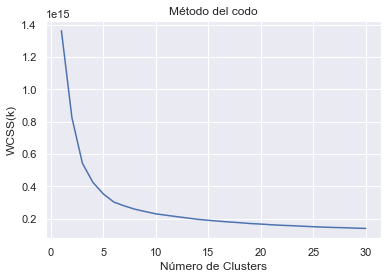

In [29]:
# Método del codo para averiguar el número óptimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,31), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [30]:
# Aplicar el método de k-means para segmentar el data set
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [186]:
#print(y_kmeans.shape)

y_kmeans = kmeans.fit_predict(X_train_kmean)

for elemento in np.nditer(y_kmeans):
    print(elemento)

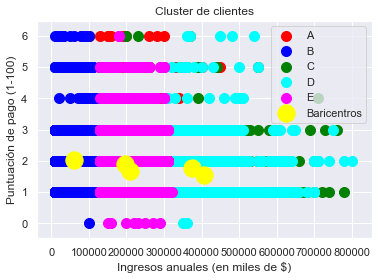

In [188]:
# Visualización de los clusters
plt.scatter(X_train_kmean[y_kmeans == 0, 0], X_train_kmean[y_kmeans == 0, 1], s = 100, c = "red", label = "A")
plt.scatter(X_train_kmean[y_kmeans == 1, 0], X_train_kmean[y_kmeans == 1, 1], s = 100, c = "blue", label = "B")
plt.scatter(X_train_kmean[y_kmeans == 2, 0], X_train_kmean[y_kmeans == 2, 1], s = 100, c = "green", label = "C")
plt.scatter(X_train_kmean[y_kmeans == 3, 0], X_train_kmean[y_kmeans == 3, 1], s = 100, c = "cyan", label = "D")
plt.scatter(X_train_kmean[y_kmeans == 4, 0], X_train_kmean[y_kmeans == 4, 1], s = 100, c = "magenta", label = "E")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Baricentros")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de pago (1-100)")
plt.legend()

In [36]:
X.iloc[100]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [91]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5 ,random_state=0)
for train, test in kf.split(X[0]):
    print("%s %s" % (train, test))

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [0 1 2 3 4]
[ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21] [5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 14 15 16 17 18 19 20 21] [10 11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 18 19 20 21] [14 15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20 21]
